#### Tutor name: Heqing (Eric) SHI
#### Contact email: Heqing.Shi@ed.ac.uk
#### Web: [personal page](https://shiheqing.github.io)
*Materials credit to @Zongxiao WU, the previous tutor.*

In [1]:
# import packages that we will use in this session
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
data = sm.datasets.get_rdataset("flchain", "survival").data

In [3]:
data

,age,sex,sample.yr,kappa,lambda,flc.grp,creatinine,mgus,futime,death,chapter
0,97,F,1997,5.700,4.860,10,1.7,0,85,1,Circulatory
1,92,F,2000,0.870,0.683,1,0.9,0,1281,1,Neoplasms
2,94,F,1997,4.360,3.850,10,1.4,0,69,1,Circulatory
3,92,F,1996,2.420,2.220,9,1.0,0,115,1,Circulatory
4,93,F,1996,1.320,1.690,6,1.1,0,1039,1,Circulatory
...,...,...,...,...,...,...,...,...,...,...,...
7869,52,F,1995,1.210,1.610,6,1.0,0,4997,0,NaN
7870,52,F,1999,0.858,0.581,1,0.8,0,3652,0,NaN
7871,54,F,2002,1.700,1.720,8,NaN,0,2507,0,NaN
7872,53,F,1995,1.710,2.690,9,NaN,0,4982,0,NaN


In [2]:
df = pd.read_csv('Data_tutorial3.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5000 non-null   int64  
 1   ID          5000 non-null   float64
 2   flagbinary  5000 non-null   float64
 3   PHONE       5000 non-null   float64
 4   MSTAT       5000 non-null   float64
 5   RSTAT       5000 non-null   float64
 6   KIDS        5000 non-null   float64
 7   CARDI       5000 non-null   float64
 8   CARDH2      5000 non-null   float64
 9   AGE         5000 non-null   float64
 10  TAD         5000 non-null   float64
 11  BUREAU      5000 non-null   float64
 12  SEARCH      5000 non-null   float64
 13  phone1      5000 non-null   float64
 14  phone2      5000 non-null   float64
 15  phonewoe    5000 non-null   float64
 16  msgrouped   5000 non-null   float64
 17  married1    5000 non-null   float64
 18  married2    5000 non-null   float64
 19  mswoe       5000 non-null  

In [4]:
df['flagbinary'].value_counts()

flagbinary
1.0    4253
0.0     747
Name: count, dtype: int64

In [5]:
# use 1 to denote bads and 0 denotes goods
df.loc[df['flagbinary']==1.0,'y']=0
df.loc[df['flagbinary']==0.0,'y']=1
df['y'].value_counts()

y
0.0    4253
1.0     747
Name: count, dtype: int64

### 1. Running logistic regression model (dummy variables)

Phone dummies

In [6]:
# We have three categories in the original PHONE variable
df['PHONE'].value_counts()

PHONE
1.0    4633
0.0     351
2.0      16
Name: count, dtype: int64

In [7]:
# For Phone 1 variable, we choose to combine 'No phone number given' (351 obs) and 'Other number given' (16 obs) categories together
df['phone1'].value_counts()

phone1
1.0    4633
0.0     367
Name: count, dtype: int64

In [8]:
# For Phone 2 variable, we choose to combine 'Home number given' (4633 obs) and 'Other number given' (16 obs) categories together
df['phone2'].value_counts()

phone2
1.0    4649
0.0     351
Name: count, dtype: int64

MSTAT dummies

In [9]:
# We have five categories in the original MSTAT variable
df['MSTAT'].value_counts()

MSTAT
1.0    2537
2.0    1739
3.0     421
4.0     157
5.0     146
Name: count, dtype: int64

In [10]:
# df.loc[(df['MSTAT']=='Co-habiting')|(df['MSTAT']=='Divorced'),'MSgrouped']=3
# df.loc[df['MSTAT']=='Single','MSgrouped']=2
# df.loc[(df['MSTAT']=='Married')|(df['MSTAT']=='Widowed'),'MSgrouped']=1
df.msgrouped.value_counts()

msgrouped
1.0    2694
2.0    1739
3.0     567
Name: count, dtype: int64

In [11]:
# Create dummy variables
# df['Married1']=0
# df['Married2']=0
# df.loc[df['MSgrouped']==1,'Married1']=1
# df.loc[df['MSgrouped']==2,'Married2']=1
print(df.married1.value_counts())
print(df.married2.value_counts())

married1
1.0    2694
0.0    2306
Name: count, dtype: int64
married2
0.0    3261
1.0    1739
Name: count, dtype: int64


AGE dummies

In [12]:
# The following commands split the variable age into fine classes: 10 groups of approximate size.
# df['AgeBinned'], cut_bin = pd.qcut(df['AGE'], q = 10, 
                                   # labels = ['Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5', 'Age_6', 'Age_7', 'Age_8', 'Age_9', 'Age_10'],
                                   # retbins = True)
# create a new AgeGrouped variable
# df.loc[df['AgeBinned'] == 'Age_1','AgeGrouped'] = 'Age_1'
# df.loc[df['AgeBinned'] == 'Age_2','AgeGrouped'] = 'Age_2'
# df.loc[df['AgeBinned'] == 'Age_3','AgeGrouped'] = 'Age_3'
# df.loc[df['AgeBinned'] == 'Age_4','AgeGrouped'] = 'Age_4'
# df.loc[df['AgeBinned'] == 'Age_5','AgeGrouped'] = 'Age_5'
# df.loc[df['AgeBinned'] == 'Age_6','AgeGrouped'] = 'Age_6'
# df.loc[df['AgeBinned'] == 'Age_7','AgeGrouped'] = 'Age_6'
# df.loc[df['AgeBinned'] == 'Age_8','AgeGrouped'] = 'Age_7'
# df.loc[df['AgeBinned'] == 'Age_9','AgeGrouped'] = 'Age_7'
# df.loc[df['AgeBinned'] == 'Age_10','AgeGrouped'] = 'Age_8'
df['agegroup'].value_counts() # We have 8 categories here
# Thus we get 7(8-1) variables including: age_g1, age_g2, age_g3, age_g4, age_g5, age_g6, age_g7 (refer to the initial df.info() table

agegroup
5.0    996
7.0    991
0.0    599
4.0    544
2.0    487
3.0    467
9.0    466
1.0    450
Name: count, dtype: int64

Regression model

In [13]:
y = df.loc[:,df.columns=='y']
# please note the dummy variable trap 
X = df.loc[:,(df.columns=='phone1')|(df.columns=='married1')|(df.columns=='age_g1')|(df.columns=='age_g2')|(df.columns=='age_g3')|(df.columns=='age_g4')|(df.columns=='age_g5')|(df.columns=='age_g6')|(df.columns=='age_g7')]

In [14]:
X.head()

,phone1,married1,age_g1,age_g2,age_g3,age_g4,age_g5,age_g6,age_g7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Statistics view

In [15]:
import statsmodels.api as sm
X1=sm.add_constant(X)
logit_model=sm.Logit(y,X1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.391876
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.071     
Date:               2025-01-19 20:56 AIC:              3938.7640 
No. Observations:   5000             BIC:              4003.9359 
Df Model:           9                Log-Likelihood:   -1959.4   
Df Residuals:       4990             LL-Null:          -2108.3   
Converged:          1.0000           LLR p-value:      7.2610e-59
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const          0.0589    0.1496   0.3936  0.6939  -0.2344   0.3522
phone1        -0.9081    0.1302  -6.9746  0.0000  -1.1633  -0.

Machine learning view

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3,stratify=y)
X_train.head()

,phone1,married1,age_g1,age_g2,age_g3,age_g4,age_g5,age_g6,age_g7
2876,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3713,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4960,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4607,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1903,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
y_train.head()

,y
2876,0.0
3713,1.0
4960,0.0
4607,0.0
1903,0.0


In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict_proba(X_test)

/Users/heqing/anaconda3/envs/TAatUEBS/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
X_train.shape

(3500, 9)

In [20]:
y_train.shape

(3500, 1)

In [21]:
X_test.shape

(1500, 9)

In [22]:
preds.shape

(1500, 2)

In [23]:
preds[0]
# 1st column is the prediction ot negative (0, goods) obs
# 2nd column is the prediction of positive (1, bads) obs

array([0.63471505, 0.36528495])

In [24]:
y_probas = preds[:, 1]

In [25]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test,y_probas)
print('ROC= ', roc)

ROC=  0.6796315214957456


In [26]:
# figure
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,y_probas)
log_auc = pd.DataFrame()
log_auc["log_tpr"] = tpr
log_auc["log_fpr"] = fpr
log_auc["log_threshold"] = threshold

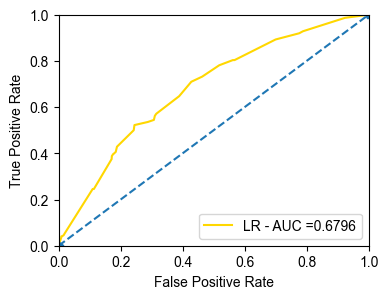

In [27]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial']  # font
plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams['savefig.dpi'] = 300 # pixel
# plt.rcParams['figure.dpi'] = 300 # resolution
plt.figure(figsize=(4,3)) # fig size
plt.plot(log_auc['log_fpr'], log_auc['log_tpr'], 'gold', label = "LR -"+ f" AUC ={roc.round(4)}")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'p--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.tick_params()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 2. Running logistic regression model (‘weights of evidence’ variables)

In [28]:
X_woe = df.loc[:,(df.columns=='phonewoe')|(df.columns=='mswoe')|(df.columns=='agewoe')]
X_woe.head()

,phonewoe,mswoe,agewoe
0,0.082480,-0.501645,1.130854
1,0.082480,-0.501645,-0.933805
2,-0.784558,0.467848,0.229745
3,-0.784558,0.467848,0.229745
4,0.082480,0.467848,1.130854


Statistics view

In [29]:
import statsmodels.api as sm
X_woe1=sm.add_constant(X_woe)
logit_model=sm.Logit(y,X_woe1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.392316
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.070     
Date:               2025-01-19 20:56 AIC:              3931.1592 
No. Observations:   5000             BIC:              3957.2280 
Df Model:           3                Log-Likelihood:   -1961.6   
Df Residuals:       4996             LL-Null:          -2108.3   
Converged:          1.0000           LLR p-value:      2.5255e-63
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const        -1.7383    0.0419  -41.4559  0.0000  -1.8205  -1.6561
phonewoe     -1.0541    0.1499   -7.0300  0.0000  -1.3480  -0.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_woe, y, random_state=42, test_size=0.3,stratify=y)
X_train.head()

,phonewoe,mswoe,agewoe
2876,0.08248,0.467848,0.229745
3713,0.08248,-0.501645,-0.933805
4960,0.08248,0.467848,0.640011
4607,0.08248,0.467848,0.466107
1903,0.08248,0.467848,-0.933805


In [31]:
y_train.head()

,y
2876,0.0
3713,1.0
4960,0.0
4607,0.0
1903,0.0


In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict_proba(X_test)

/Users/heqing/anaconda3/envs/TAatUEBS/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
X_train.shape

(3500, 3)

In [34]:
X_test.shape

(1500, 3)

In [35]:
preds.shape

(1500, 2)

In [36]:
y_probas = preds[:, 1]

In [37]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test,y_probas)
print('ROC= ', roc)

ROC=  0.682014106583072


In [38]:
# figure
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,y_probas)
log_auc = pd.DataFrame()
log_auc["log_tpr"] = tpr
log_auc["log_fpr"] = fpr
log_auc["log_threshold"] = threshold

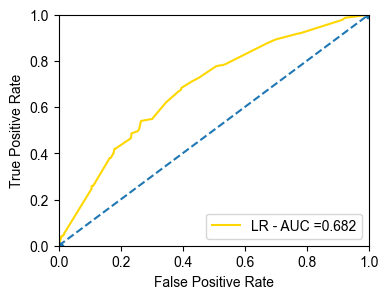

In [39]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial']  # font
plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams['savefig.dpi'] = 300 # pixel
# plt.rcParams['figure.dpi'] = 300 # resolution
plt.figure(figsize=(4,3)) # fig size
plt.plot(log_auc['log_fpr'], log_auc['log_tpr'], 'gold', label = "LR -"+ f" AUC ={roc.round(4)}")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'p--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.tick_params()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()